### Часть 1. Программирование на Python

Ссылка на контест:

http://45.77.142.102/cgi-bin/new-client?contest_id=11

### Часть 2. Проверка статистических гипотез

На платформе Delivery Club рестораны с быстрой скоростью доставки (готовка блюда + доставка блюда курьером до клиента), как правило - это рестораны, которые пользуются наибольшей популярность среди пользователей и получают наивысшую оценку (5 баллов). 

Дан датасет **quality_restaurants.csv**, который преставляет из себя выборку с характеристиками некоторых ресторанов платформы DC. 

*avg_cook_time* - среднее время готовки ресторана, 

*avg_rest_toclient_time* - среднее время доставки блюда курьером ресторана до клиента, 

*rating* - бальная оценка ресторана (средний пользовательский рейтинг).

*restaurant_id* - идентификатор ресторана

*city_id* - идентификатор города

### Задание 1

Есть ли разница между **средним временем готовки ресторанов с рейтингом 5 звезд, 4 звезды, меньше 4 звезд.** При оценке использовать непараметрический критерий.

In [1]:
#Место для решения

In [21]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv("quality_restaurants.csv")
print(df.shape)
df.head(5)

(302, 5)


,avg_cook_time,avg_rest_toclient_time,rating,city_id,restaurant_id
0,14.567977,18.829249,5,1,0
1,2.663857,2.358426,3,3,1
2,11.066652,13.000000,1,3,2
3,14.843242,12.670241,5,3,3
4,8.097093,21.126678,3,2,4


Создали три выборки (соответствующих времени готовки) и хотим проверить, 
есть ли разница между их средним временем

In [18]:
rest5=np.array(df[df['rating']==5]['avg_cook_time'])
rest4=np.array(df[df['rating']==4]['avg_cook_time'])
rest123=np.array(df[df['rating']<4]['avg_cook_time'])

In [25]:
print(rest5[0:5])
print(rest4[0:5])
print(rest123[0:5])

[14.56797749 14.84324212 24.16746317 12.8064734  18.47445037]
[1.17447045e+01 6.86479871e+00 9.99992722e+06 5.59901920e+00
 1.00000000e+01]
[ 2.66385732 11.06665212  8.0970927   5.75922928  6.25264183]


In [72]:
print(len(rest4))
print(len(rest4[np.where(rest4 < 100)]))
print(rest4[np.where(rest4 > 100)])

43
40
[9999927.21569108 9999927.21569108 9999927.21569108]


В mas4 видим три выброса, выкинем их 
(можно также заменить на среднее выборки без выбросов)

In [73]:
rest4New=rest4[np.where(rest4 < 100)]
print(rest5.mean())
print(rest4New.mean())
print(rest123.mean())

15.513275938929116
13.346088143392524
12.101600034614815


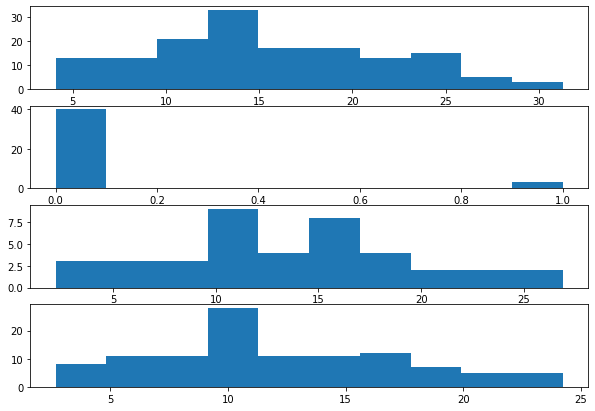

In [44]:
fig = plt.figure(figsize=(10, 7))
ax1 = plt.subplot(411)
plt.hist(rest5)

ax2 = plt.subplot(412)
plt.hist(rest4)

ax3 = plt.subplot(413)
plt.hist(rest4New)

ax4 = plt.subplot(414)
plt.hist(rest123)

plt.show()

In [45]:
print("rest5:", rest5.mean())
print("rest4New:", rest4New.mean())
print("rest123:", rest123.mean())

rest5: 15.513275938929116
rest4New: 13.346088143392524
rest123: 12.101600034614815


Будем использовать непараметрический критерий манна-уитни для несвязанных выборок
Проверим, как тест работает

In [60]:
mas1=[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
mas2=[5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
stats.mannwhitneyu(mas1, mas2, alternative = 'less')

MannwhitneyuResult(statistic=0.0, pvalue=1.4619790390710828e-08)

a) проверить гипотезу H0 о том, что время готовки в rest5 и в rest4New равны, 
против альтернативы H1, что время в rest5 и в rest4New не равны.

In [49]:
stats.mannwhitneyu(rest4New, rest5, alternative = 'two-sided')

MannwhitneyuResult(statistic=2448.0, pvalue=0.07429638512002966)

Видим, что pvalue=0.84 >0.05, поэтому нулевую гипотезу отвергнуть нельзя

b) проверить гипотезу H0 о том, что время готовки в rest5 и в rest123 равны, 
против альтернативы H1, что время в rest5 и в rest123 не равны.

In [50]:
stats.mannwhitneyu(rest123, rest5, alternative = 'two-sided')

MannwhitneyuResult(statistic=5644.0, pvalue=2.1158435104545363e-05)

Видим, что pvalue=< 0.05, поэтому нулевую гипотезу отвергаем, 
то есть времена в rest5 и rest123 не равны

Проверим гипотезу H0 о том, что время готовки в rest5 и в rest123 равны, 
против альтернативы H1, что время в rest123  <  времени в rest5.

In [52]:
stats.mannwhitneyu(rest123, rest5, alternative = 'less')

MannwhitneyuResult(statistic=5644.0, pvalue=1.0579217552272682e-05)

Видим, что pvalue=< 0.05, поэтому нулевую гипотезу отвергаем, 
альтернативу принимаем

Проверим гипотезу H0 о том, что время готовки в rest5 и в rest123 равны, 
против альтернативы H1, что время в rest123  > времени в rest5.

In [59]:
stats.mannwhitneyu(rest123, rest5, alternative = 'greater')

MannwhitneyuResult(statistic=5644.0, pvalue=0.9999894999058471)

Видим, что pvalue> 0.05, поэтому нулевую гипотезу не отвергаем

c) проверить гипотезу H0 о том, что время готовки в rest4New и в rest123 равны, против альтернативы H1, что время в rest4New и в rest123 не равны.

In [61]:
stats.mannwhitneyu(rest123, rest4New, alternative = 'two-sided')

MannwhitneyuResult(statistic=1894.0, pvalue=0.22119693883173397)

In [ ]:
pvalue > 0.05, поэтому нулевую гипотезу о равенстве отвергнуть не можем

In [62]:
stats.mannwhitneyu(rest123, rest4New, alternative = 'less')

MannwhitneyuResult(statistic=1894.0, pvalue=0.11059846941586698)

In [63]:
stats.mannwhitneyu(rest123, rest4New, alternative = 'greater')

MannwhitneyuResult(statistic=1894.0, pvalue=0.8902082749431278)

Тест не смог отвергнуть гипотезу о равенстве ни в пользу правосторонней, ни в пользу левосторонней гипотезы

### Задание 2


Для **города 2** рассчитать силу взаимосвязи между среднем временем готовки ресторана и среднем временем доставки. Позволяют ли полученные данные говорить о существовании связи? 

In [2]:
#Место для решения

In [67]:
city2=df[df['city_id']==2]
print(city2.shape)
city2.head(5)

(97, 5)


,avg_cook_time,avg_rest_toclient_time,rating,city_id,restaurant_id
4,8.097093,21.126678,3,2,4
5,24.167463,15.557156,5,2,5
6,12.806473,25.317246,5,2,6
7,5.759229,9.280962,3,2,7
15,12.947928,7.920449,5,2,15


In [68]:
gotovka=np.array(city2['avg_cook_time'])
dostavka=np.array(city2['avg_rest_toclient_time'])

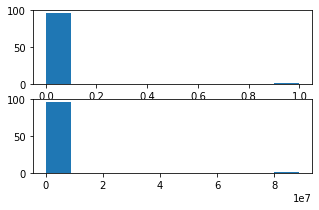

In [70]:
fig = plt.figure(figsize=(5, 3))
ax1 = plt.subplot(211)
plt.hist(gotovka)

ax2 = plt.subplot(212)
plt.hist(dostavka)

plt.show()

Видим, что есть выбросы

In [75]:
print(gotovka[np.where(gotovka > 100)])
print(dostavka[np.where(dostavka > 100)])

[9999927.21569108]
[88887789.93528406]


In [85]:
gotovkaNew=gotovka[np.where(gotovka < 100)]
dostavkaNew=dostavka[np.where(dostavka < 100)]

In [92]:
mydict = {'gotovka': gotovkaNew, 'dostavka': dostavkaNew}
new_df=pd.DataFrame(mydict)
new_df.head(5)

,gotovka,dostavka
0,8.097093,21.126678
1,24.167463,15.557156
2,12.806473,25.317246
3,5.759229,9.280962
4,12.947928,7.920449


In [93]:
new_df[['gotovka','dostavka']].corr()

,gotovka,dostavka
gotovka,1.000000,-0.096783
dostavka,-0.096783,1.000000


Видим, что корреляция очень маленькая

Проверим это тестом: 
нулевая гипотеза: корреляция=0,
    альтернатива-что не равна

In [95]:
stats.pearsonr(new_df.gotovka,new_df.dostavka)

(-0.09678320877190644, 0.3482133328271465)

pvalue > 0.05, поэтому нулевую гипотезу о равенстве корреляции нулю - не отвергаем

### Часть 3. SQL

Дана таблица **CLIENTS** со следующими столбцами: id (идентификатор клиента), point (местоположение клиента).
Также дана таблица **RESTAURANTS**, поля - id (идентификатор ресторана), point (местоположение ресторана).
Задача - написать SQL-запрос, отвечающий на следующий вопрос: какое среднее расстояние между каждым клиентом и каждым рестораном.

*Примечание*: функция для вычисления расстояни между 2 местоположениями - st_distance(point1,point2).

In [3]:
#Место для решения
#Надо написать только код запроса

In [ ]:
"""SELECT st_distance(cl.point, rest.point)
FROM CLIENTS as cl, RESTAURANTS as rest 
 """
#это декартово произведение

In [119]:
import time
import functools
import math


def retry(check, n_attempts=5):
    def decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **argv):
            
            nonlocal n_attempts
            state_of_check=False
            
            if (n_attempts is None or n_attempts <=0):
                while True:
                    result = func(*args, **argv)
                    state_of_check=check(result)
                    if (state_of_check):
                        break
                    
            else:
                for i in range(n_attempts):
                    result = func(*args, **argv)
                    state_of_check=check(result)
                    if (state_of_check):
                        break
                
            if (state_of_check is False):
                raise RuntimeError("Expired number of retries")
                
            return result
        return wrapper
    return decorator

In [120]:
@retry(check=bool)
def func(a):
    return a

try:
    print(func(3))
except RuntimeError as e:
    print(e)

3


In [121]:
gen = iter(range(100))

@retry(check=lambda x: x >= 5, n_attempts=6)
def func():
    return next(gen, -1)

try:
    print(func())
except RuntimeError as e:
    print(e)

5


In [122]:
gen = iter(range(2))

@retry(check=lambda x: x >= 5, n_attempts=6)
def func():
    return next(gen, -1)

try:
    print(func())
except RuntimeError as e:
    print(e)


Expired number of retries


In [123]:
gen = iter(range(1000))

@retry(check=lambda x: x < 0, n_attempts=-1)
def func():
    return next(gen, -1)

try:
    print(func())
except RuntimeError as e:
    print(e)

-1


In [197]:
def sew(mas1, mas2):
    if len(mas1) == 0:
        return mas2
    if len(mas2) == 0:
        return mas1
    if mas1[0] > mas2[0]:
        mas1, mas2 = mas2, mas1
    otv = []
    otv.append(mas1[0])
    i = 1
    j = 0
    while (i < len(mas1) and j < len(mas2)):
        while (j < len(mas2) and mas2[j] < mas1[i]):
            otv.append(mas2[j])
            j = j + 1
        otv.append(mas1[i])
        i = i + 1
    while (i < len(mas1)):
        otv.append(mas1[i])
        i = i + 1
    while(j < len(mas2)):
        otv.append(mas2[j])
        j = j + 1
    return otv


def merge_sort(mas, group_len=1):
    mas = [el for el in mas]
    if (group_len >= len(mas)):
        return
    new_mas = []
    i = 0
    while (i + 2 * group_len - 1 <= len(mas)):
        mas1 = mas[i: i + group_len]
        mas2 = mas[i + group_len: i + 2 * group_len]
        for el in sew(mas1, mas2):
            new_mas.append(el)
        i = i + 2 * group_len
    if (i + group_len - 1 <= len(mas)):
        mas1 = mas[i: i + group_len]
        mas2 = mas[i + group_len:]
        for el in sew(mas1, mas2):
            new_mas.append(el)
    else:
        for el in mas[i:]:
            new_mas.append(el)
    yield new_mas
    yield from merge_sort(new_mas, 2 * group_len)


In [198]:
for item in merge_sort([5, 3, 4, 6]):
    print(item)

[3, 5, 4, 6]
[3, 4, 5, 6]


In [199]:
for item in merge_sort(reversed(range(14))):
    print(item)

[12, 13, 10, 11, 8, 9, 6, 7, 4, 5, 2, 3, 0, 1]
[10, 11, 12, 13, 6, 7, 8, 9, 2, 3, 4, 5, 0, 1]
[6, 7, 8, 9, 10, 11, 12, 13, 0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [200]:
for item in merge_sort([5, 3,8, 4, 6]):
    print(item)

[3, 5, 4, 8, 6]
[3, 4, 5, 8, 6]
[3, 4, 5, 6, 8]
